<a href="https://colab.research.google.com/github/rizkyirw/MSIB/blob/main/Intro_to_Python_5_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

# 1. How to solve a Data Analytics Use Case?


1. Exploratory Analysis

    - Use Data visualization to answer the business problem
        - Univariate Analysis - visualize one feature individually to understand it
        - Bivariate Analysis - understand impact of feature on target/label
        - Multivariate Analysis - undertand impact of mutliple features altogether on the target/label
    - Use statistics to answer business problem
2. Create Report / comment your findings, support them with real world logic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('churn.csv')
df.shape

(10000, 14)

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 2. DATA EXPLORATION

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Note: Columns - RowNumber, CustomerId, Surname can not have any information to answer Why Customers Exited, as these columns are just identifiers of the customers.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Note: bcs the geography and gender are object, they may have the missing value as '?', '.', or something else eventhough they have nol-null

In [6]:
#Check unique values in geography and gender

print(df.Geography.unique())
print(df.Gender.unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [7]:
#statistical exploration
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Note:
    1. MOre than 25% of customers have 0 balance in their account as minimum balamce reported.

# 3. DATA CLEANING

In [9]:
#check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
#check for duplicated rows
df.duplicated().sum()

0

In [11]:
#remove unwanted columns
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [17]:
for ex in df['Exited'].unique():
  print(ex)

1
0


In [18]:
# Persentase customer female yang churn dan stay

percentages = []
for ex in df["Exited"].unique(): #for ex in df["Exited"].unique() mengandung nilai 1 dan 0
    p = round((df['Gender'][df["Exited"]==ex].value_counts()['Female']/df["Exited"][df['Gender']=='Female'].value_counts().sum())*100, 2) 
    percentages.append(p)
    print(ex, "female :" , p)


# Persentase customer male yang churn dan stay
for ex in df["Exited"].unique():
    p = round((df['Gender'][df["Exited"]==ex].value_counts()['Male']/df["Exited"][df['Gender']=='Male'].value_counts().sum())*100, 2) 
    percentages.append(p)
    print(ex, "male :" , p)


1 female : 25.07
0 female : 74.93
1 male : 16.46
0 male : 83.54


In [19]:
df['Gender'][df["Exited"]==1].value_counts()['Female']

1139

In [20]:
df["Exited"][df['Gender']=='Female'].value_counts().sum()

4543

In [ ]:
for ex in df["Exited"].unique():
  a = ex + 1
  print(a)

2
1


In [ ]:
df["Exited"].unique()

array([1, 0])

In [21]:
#deskripsi detail perhitungan persentase

female_churn =df['Gender'][df['Exited']==1].value_counts()['Female']   
female_total =df['Gender'].value_counts()['Female'].sum()
# female_total =df['Exited'][df['Gender']=='Female'].value_counts().sum()
persentase_female_churn = round((female_churn/female_total)*100, 2)
print(female_churn)
print(female_total)
print(persentase_female_churn)

1139
4543
25.07


# 4. EXPLORATORY ANALYTICS

### Univariate Analysis

    - analysing one column at a time, not looking at inference with respect to label

#### Numeric

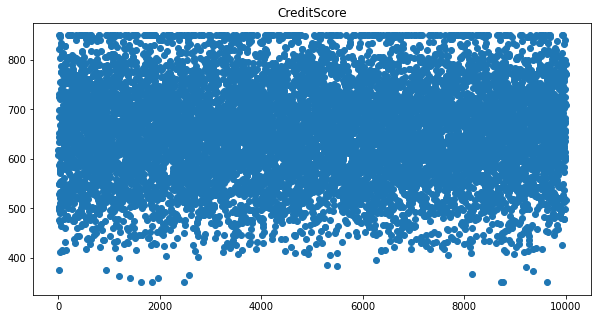

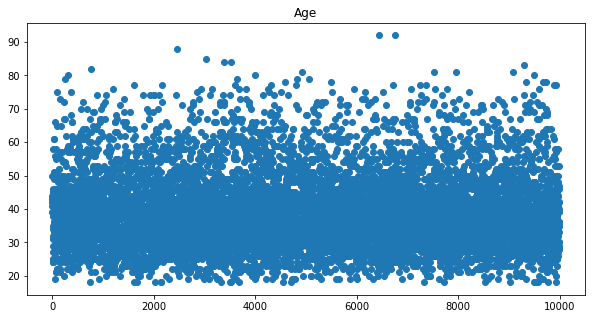

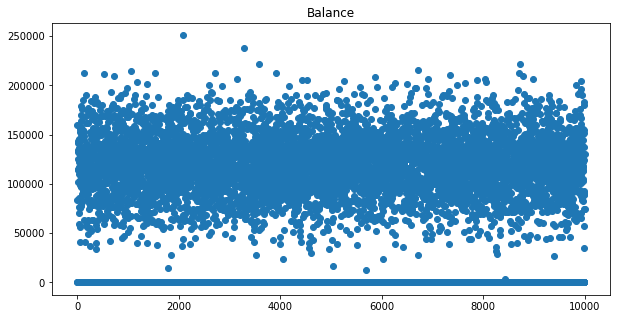

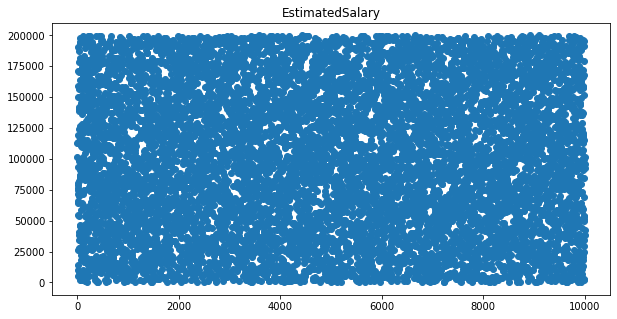

In [51]:
#CreditScore, Age, Balance

for col in ['CreditScore','Age','Balance','EstimatedSalary']:
    plt.figure(figsize=(10,5))
    plt.scatter(np.arange(10000), df[col])
    plt.title(col)
    plt.show()

Note:
    - in case of balance, there are 2 groups. one has 0 balance, another one has more than 50000 balance
    - majority of cust have age between 20 - 50

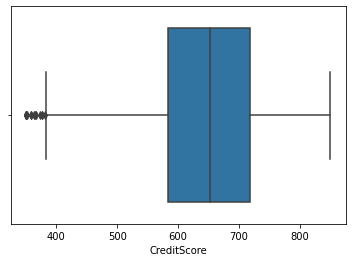

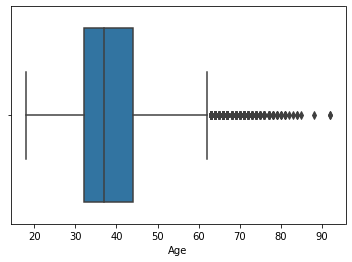

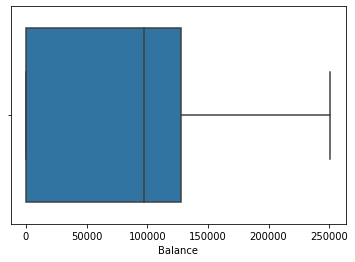

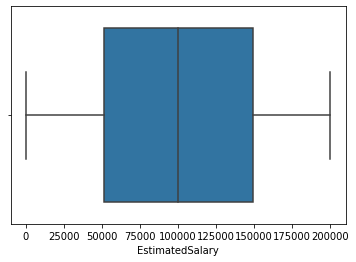

In [52]:
#Seeking outliers
for col in ['CreditScore','Age','Balance','EstimatedSalary']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])

#### categorical

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


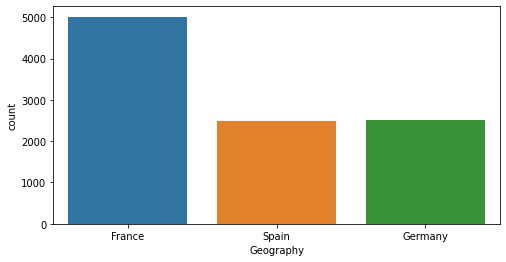

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


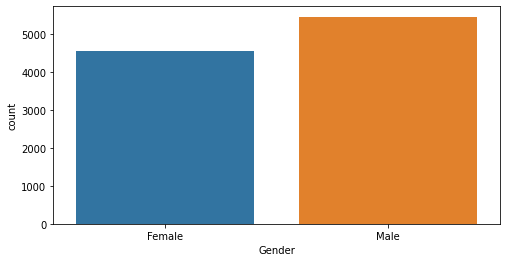

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


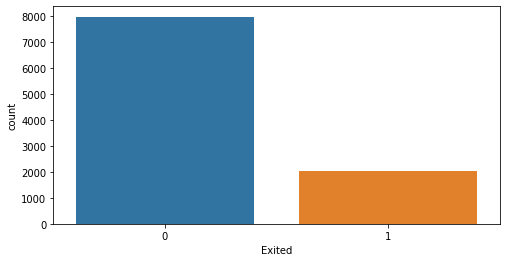

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


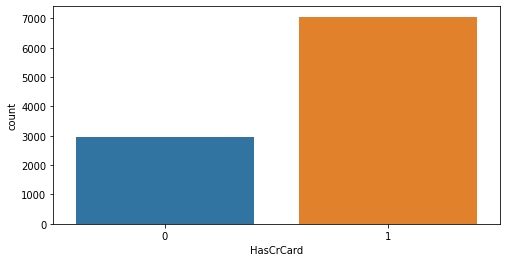

In [53]:
#Countplot for categorical

for col in ['Geography','Gender',"Exited",'HasCrCard']:
    plt.figure(figsize=(8,4))
    sns.countplot(df[col])
    plt.show()

Note:
1. almost 50% of customers are from France, rest 25% approx from each Germany and Spain
2. mojority of customers are Male and aroudn 4500 are female
3. 20% of customers left the bank
4. 30% of customers do not have credit card

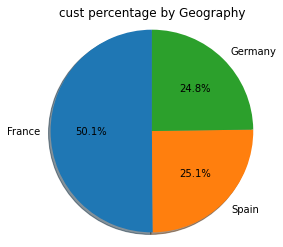

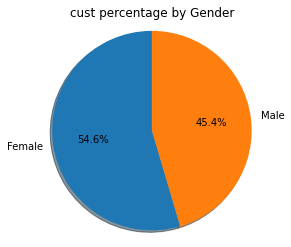

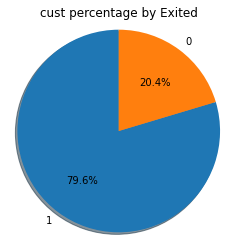

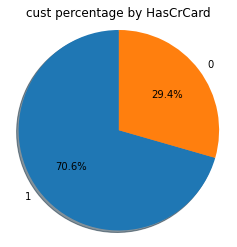

In [54]:
#Pie Chart
#pakai looping agar tinggal 1x nulis aja

for col in ['Geography','Gender',"Exited",'HasCrCard']:
  plt.figure(figsize=(4,4))
  plt.pie(df[col].value_counts(), labels=df[col].unique(), autopct='%1.1f%%', #[col] menghitung/count tiap nilai
          shadow=True, startangle=90)
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title(f'cust percentage by {col}')

  #plt.show()
  plt.savefig('gambarpie')

### Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


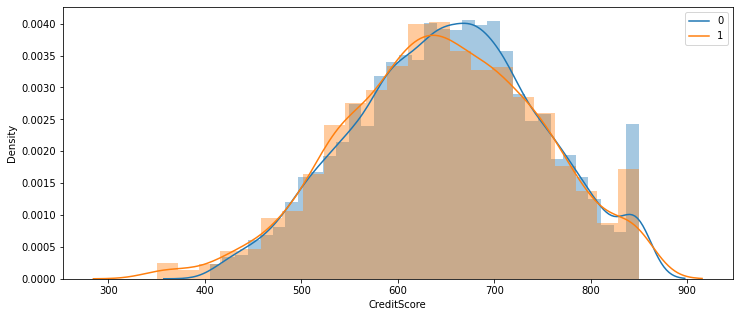

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


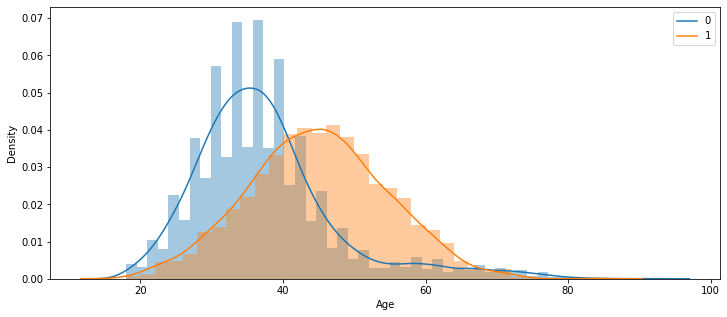

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


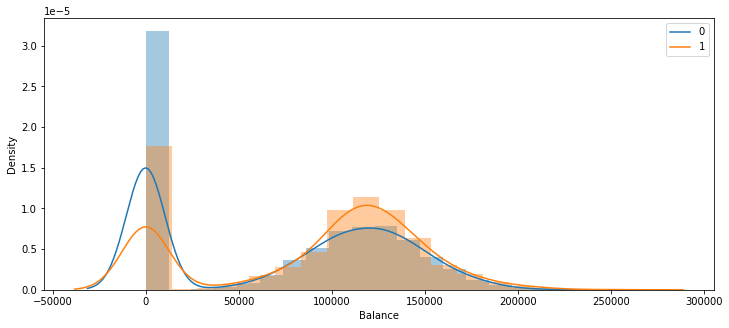

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


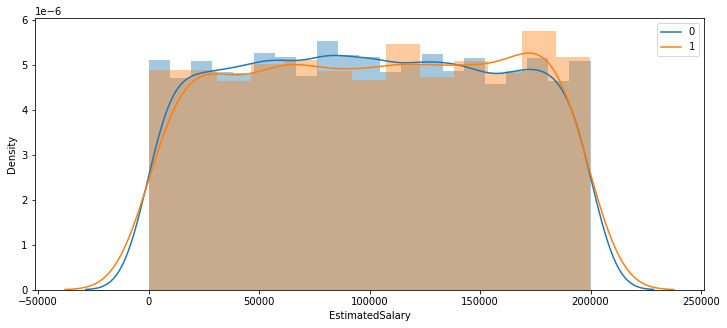

In [55]:
#numerical vs categorical - probability density distribution - distplot
#creditscore vs exited 
#yang membuat bivariate -> exited(masuk kategori (stay))/churn(tdk masuk kategori(no stay)) atau enggaknya customer
#ingin ngebandingin numerical (age) dan categorical (exited/churn)

for col in ['CreditScore','Age','Balance','EstimatedSalary']:
    plt.figure(figsize=(12,5))
    sns.distplot(df[col][df.Exited==0]) #-> Bivariate condition
    sns.distplot(df[col][df.Exited==1])
    plt.legend(['0','1'])
    plt.show()

#insight by 'Age' = Umur 40 titik cutoff, orang mengalami churn puncaknya 40-50, sedangkan 40 kebawah, cenderung stay dan tidak akan churn
#insight kalo sama tdk naik balance, jdi gak ada faktor yg memengaruhi dia akan churn/exited

Note:
    
1. for creditscore are almost overlapping 
   each other, that means at evey value of creditscore the probability of customer leaving and not leaving is almost 
   same, credit score may not have any information to predict, which cusomter will leave

2. for age there is possibility of the young age (20<age<40) to not leaving, while the old age (>40) is possible to leave


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


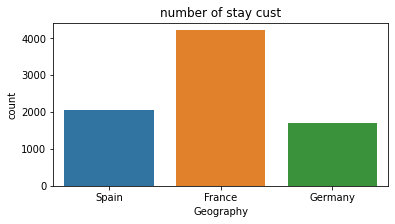

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


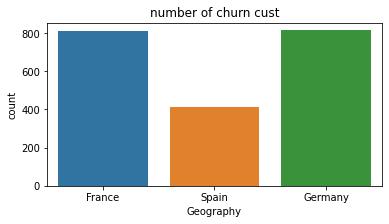

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


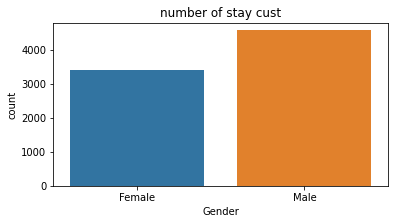

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


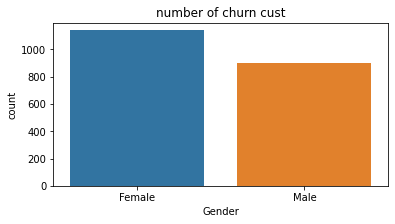

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


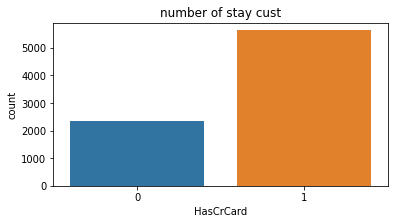

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


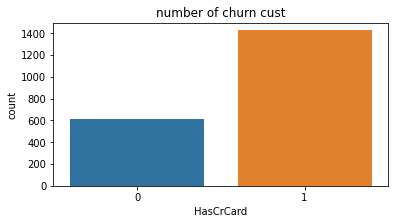

In [56]:
#categorical vs categorical - countplot

for col in ['Geography','Gender','HasCrCard']:
    plt.figure(figsize=(6,3))
    sns.countplot(df[col][df.Exited==0])
    plt.title('number of stay cust')
    plt.show()
    plt.figure(figsize=(6,3))
    sns.countplot(df[col][df.Exited==1])
    plt.title('number of churn cust')
    plt.show()

In [57]:
for col in ['Geography','Gender','HasCrCard']:
    out = pd.crosstab(df[col],df['Exited'], margins=True)
    print(out)

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000
Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000
Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000


### Multivariate Analysis

In [58]:
# num vs num vs categ - scatterplot (seaborn)

# Age, CreditScore, Exited

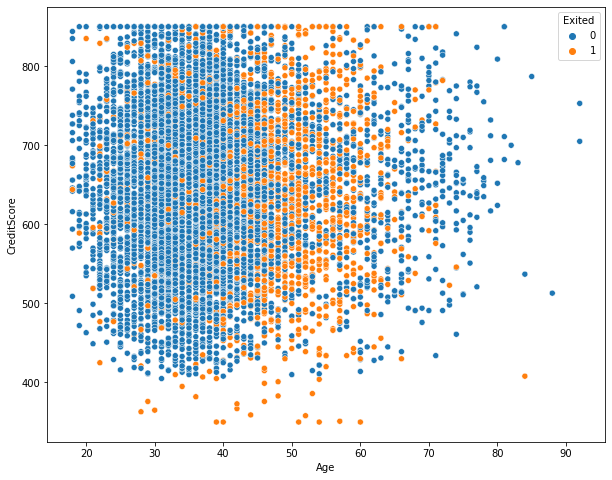

In [59]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age', y='CreditScore',hue='Exited',data=df)
#plt.show()
plt.savefig('plot')

#cut off age 40
#cara bacanya bawah (age) keatas (creditscore)
#terdapat creditscore dibawah 400, yang mana mereka churn

Note:

    - customers having creditscore<400 are leaving
    - customers between age 40-65 are leaving, for customers age<40 and age>65 are mostly not leaving

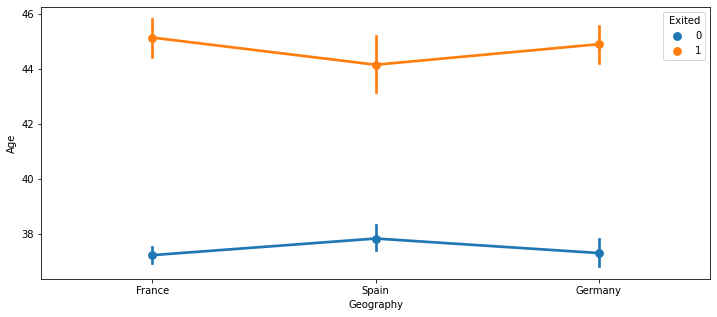

In [60]:
# num vs categ vs categ - pointplot
# Age, geo, Exited || x=geo, y=age, hue=exited

plt.figure(figsize=(12,5))
sns.pointplot(x='Geography', y='Age',hue='Exited',data=df)
plt.show()


Note:
    
        Old age customers are leaving the bank, that pattern exist in all the three countries

- statistics for exploratory analytics

### Corelation Analysis

cor>0.5 - V good, positive >> x increases .. y increases
cor>0.1 and cor<0.5 - good, positive >> x increases .. y increases

cor<-0.5 - V good, negative >> x increases .. y decrease
cor>-0.5 and cor<-0.1 - good, negative >> x increases .. y decrease

cor is between -0.1 to +0.1 >> bad correlation

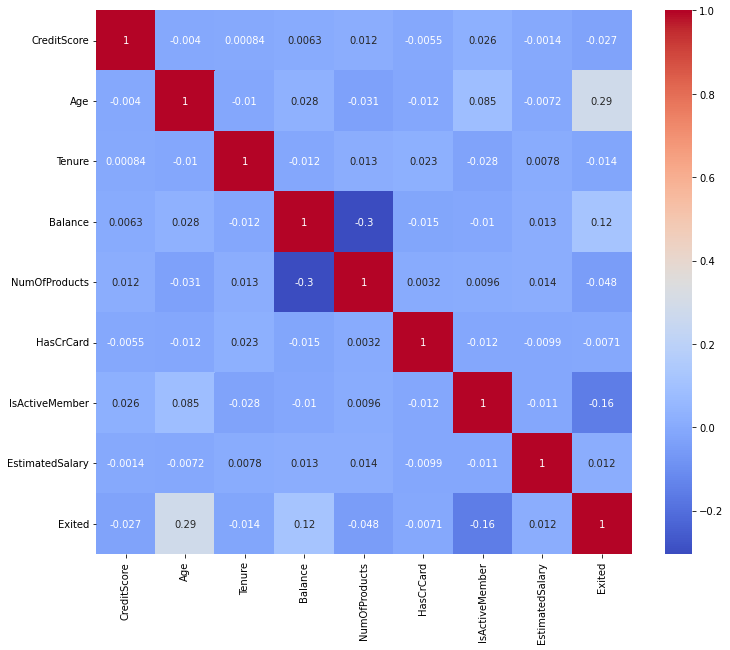

In [61]:
# calculate correlation

cor = df.corr() # to get the correlation matrix

# to visualize the correlation matrix we will use heatmap
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

#klo semakin keatas - berpengaruh lurus
#klo biru berpengaruh terbalik
#'age' bisa jadi support finding

Note:

    - Age, and Balance have positive correlation with Exited
    - Is Active Member has negative correlation with Exited
    - Num of products may have some nonlinear relation with Exited

## Time Series

In [65]:
time_df = pd.read_csv('monthly-beer-production-in-austr.csv')
time_df.dtypes

Month                       object
Monthly beer production    float64
dtype: object

In [66]:
#Convert kolom month ke datetime

time_df['Month'] = time_df['Month'].astype('datetime64')
time_df.dtypes

Month                      datetime64[ns]
Monthly beer production           float64
dtype: object

In [67]:
#Buat kolom month

time_df['month'] = time_df['Month'].dt.month_name()

In [68]:
#Buat kolom year

time_df['year'] = time_df['Month'].dt.year

In [69]:
time_df

,Month,Monthly beer production,month,year
0,1956-01-01,93.2,January,1956
1,1956-02-01,96.0,February,1956
2,1956-03-01,95.2,March,1956
3,1956-04-01,77.1,April,1956
4,1956-05-01,70.9,May,1956
...,...,...,...,...
471,1995-04-01,127.0,April,1995
472,1995-05-01,151.0,May,1995
473,1995-06-01,130.0,June,1995
474,1995-07-01,119.0,July,1995


### Simple Line

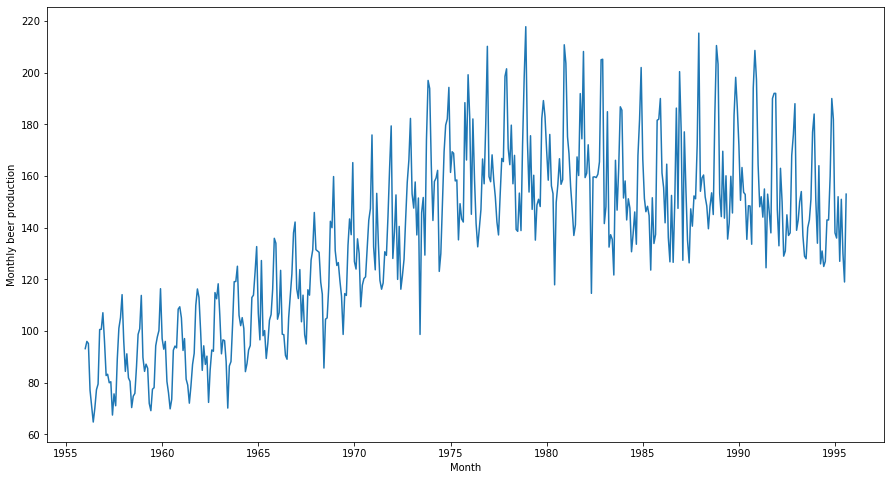

In [70]:
plt.figure(figsize=(15,8))

sns.lineplot(data=time_df, x ='Month', y = 'Monthly beer production',
                  palette='viridis')

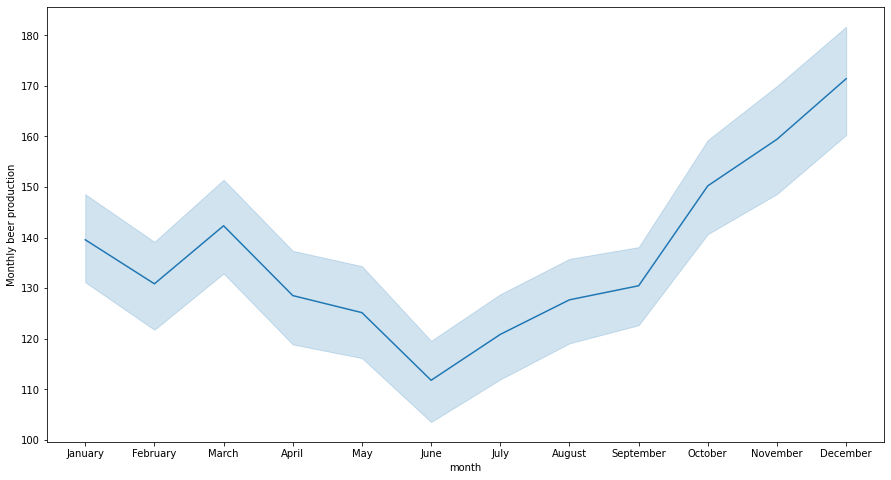

In [71]:
plt.figure(figsize=(15,8))

sns.lineplot(data=time_df, x ='month', y = 'Monthly beer production',
                  palette='viridis')

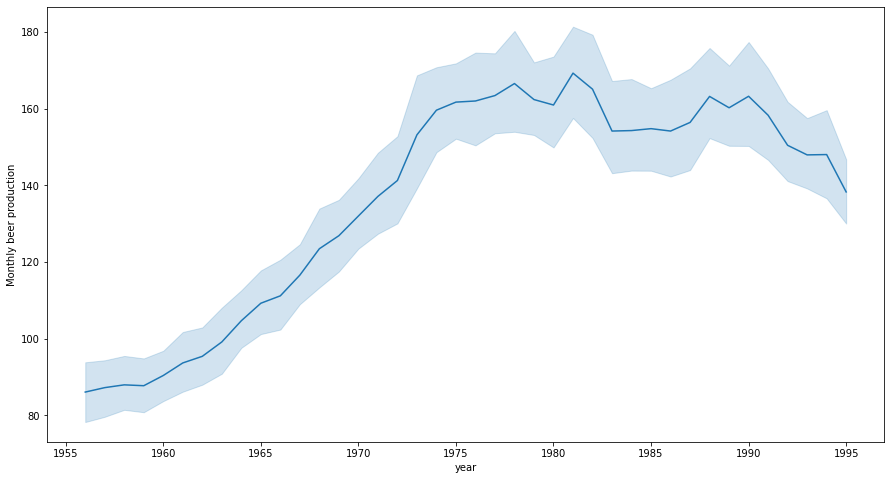

In [72]:
plt.figure(figsize=(15,8))

sns.lineplot(data=time_df, x ='year', y = 'Monthly beer production',
                  palette='viridis'
                  )

### Time Series with Bar

<BarContainer object of 476 artists>

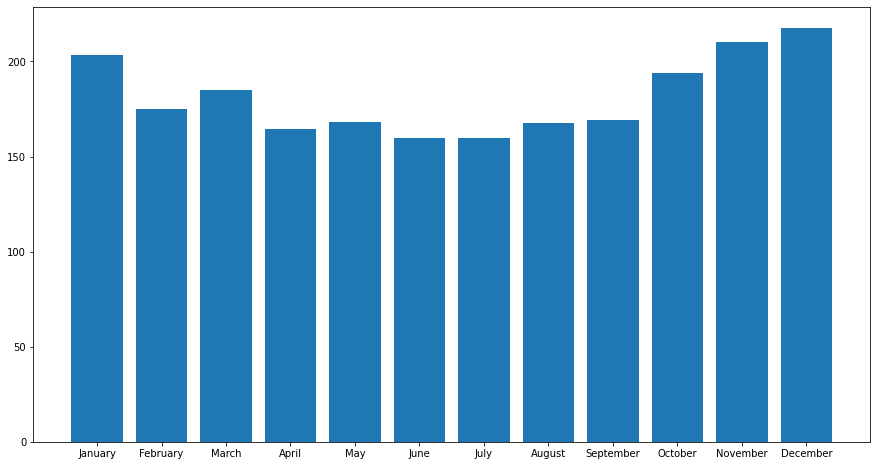

In [73]:
plt.figure(figsize=(15,8))
plt.bar(time_df['month'], time_df['Monthly beer production'])

### Line with Filter

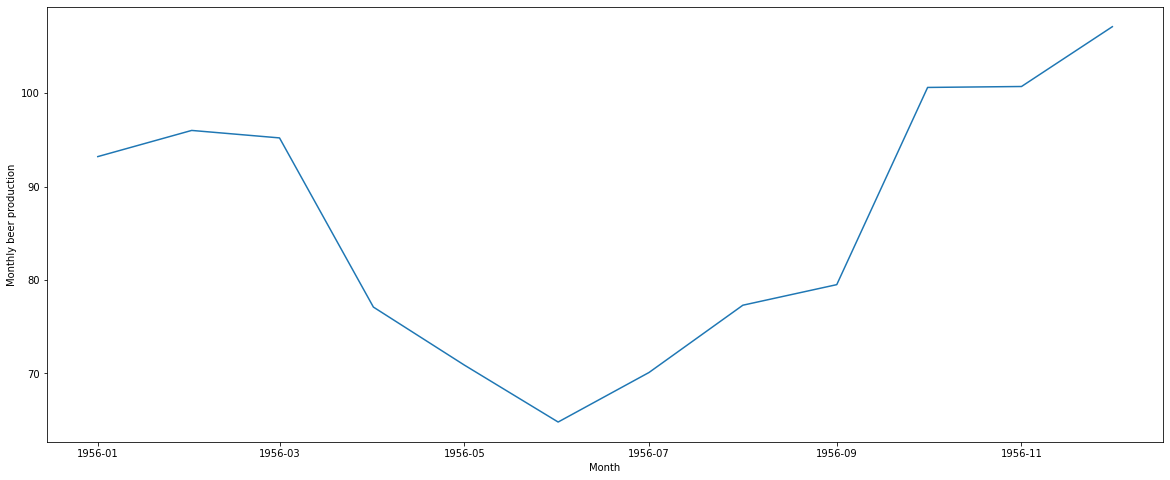

In [74]:
plt.figure(figsize=(20,8)) 
tahun_1956_df = time_df.query("year == 1956") 
sns.lineplot(data=tahun_1956_df, x="Month", y="Monthly beer production")

### Multiline

In [75]:
tahun_1956_df = time_df.query("year == 1956")
tahun_1965_df = time_df.query("year == 1965")
tahun_1975_df = time_df.query("year == 1975")
tahun_1985_df = time_df.query("year == 1985")

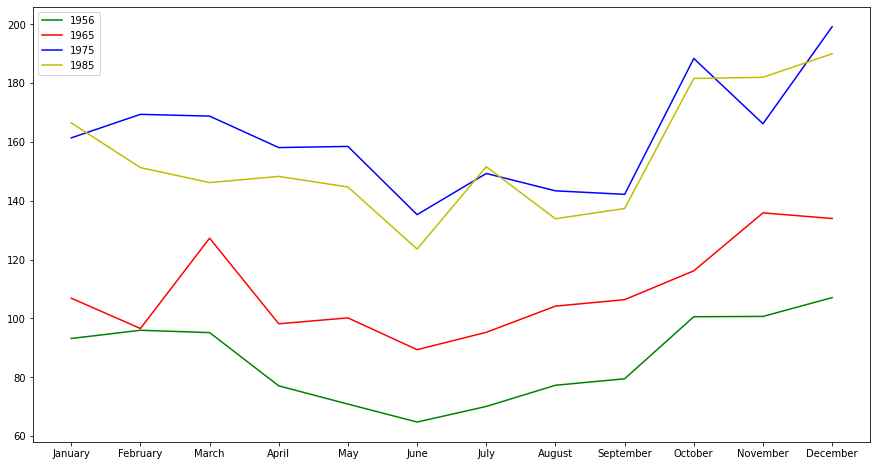

In [76]:
plt.figure(figsize=(15,8))
# Plot a simple line chart
plt.plot(tahun_1956_df['month'], tahun_1956_df['Monthly beer production'], 'g', label='1956')

# Plot another line on the same chart/graph
plt.plot(tahun_1965_df['month'], tahun_1965_df['Monthly beer production'], 'r', label='1965')

# Plot another line on the same chart/graph
plt.plot(tahun_1975_df['month'], tahun_1975_df['Monthly beer production'], 'b', label='1975')

# Plot another line on the same chart/graph
plt.plot(tahun_1985_df['month'], tahun_1985_df['Monthly beer production'], 'y', label='1985')

plt.legend()
plt.show()